# Data Analysis Or EDA 

In [119]:
#importing libraries
# from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import seaborn as sns
import datetime as dt

from sklearn.feature_extraction.text import CountVectorizer
# from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import tree

In [64]:
df = pd.read_csv('Netflix_movies_and_tv_shows_clustering.csv')

In [65]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [66]:
df['director'].fillna('unknown', inplace=True)
df['cast'].fillna('unknown', inplace=True)
df['country'].fillna('unknown', inplace=True)
df['date_added'].fillna('unknown', inplace=True)
df['rating'].fillna('unknown', inplace=True)

In [67]:
def date(row):
  a = row['date_added']
  if 'unknown' not in a:
    month = a.split()[0]
    year = a.split()[-1]
    day = a.split()[1].split(',')[0]
    a = dt.datetime.strptime(f'{month[:3]} {day} {year}' , '%b %d %Y')
    return a
  else:
    return np.nan

df['date_added'] = df.apply(lambda x: date(x), axis=1)

### **Histogram plot of release dates of shows/movies on Netflix**

C:\Users\D Phanindra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

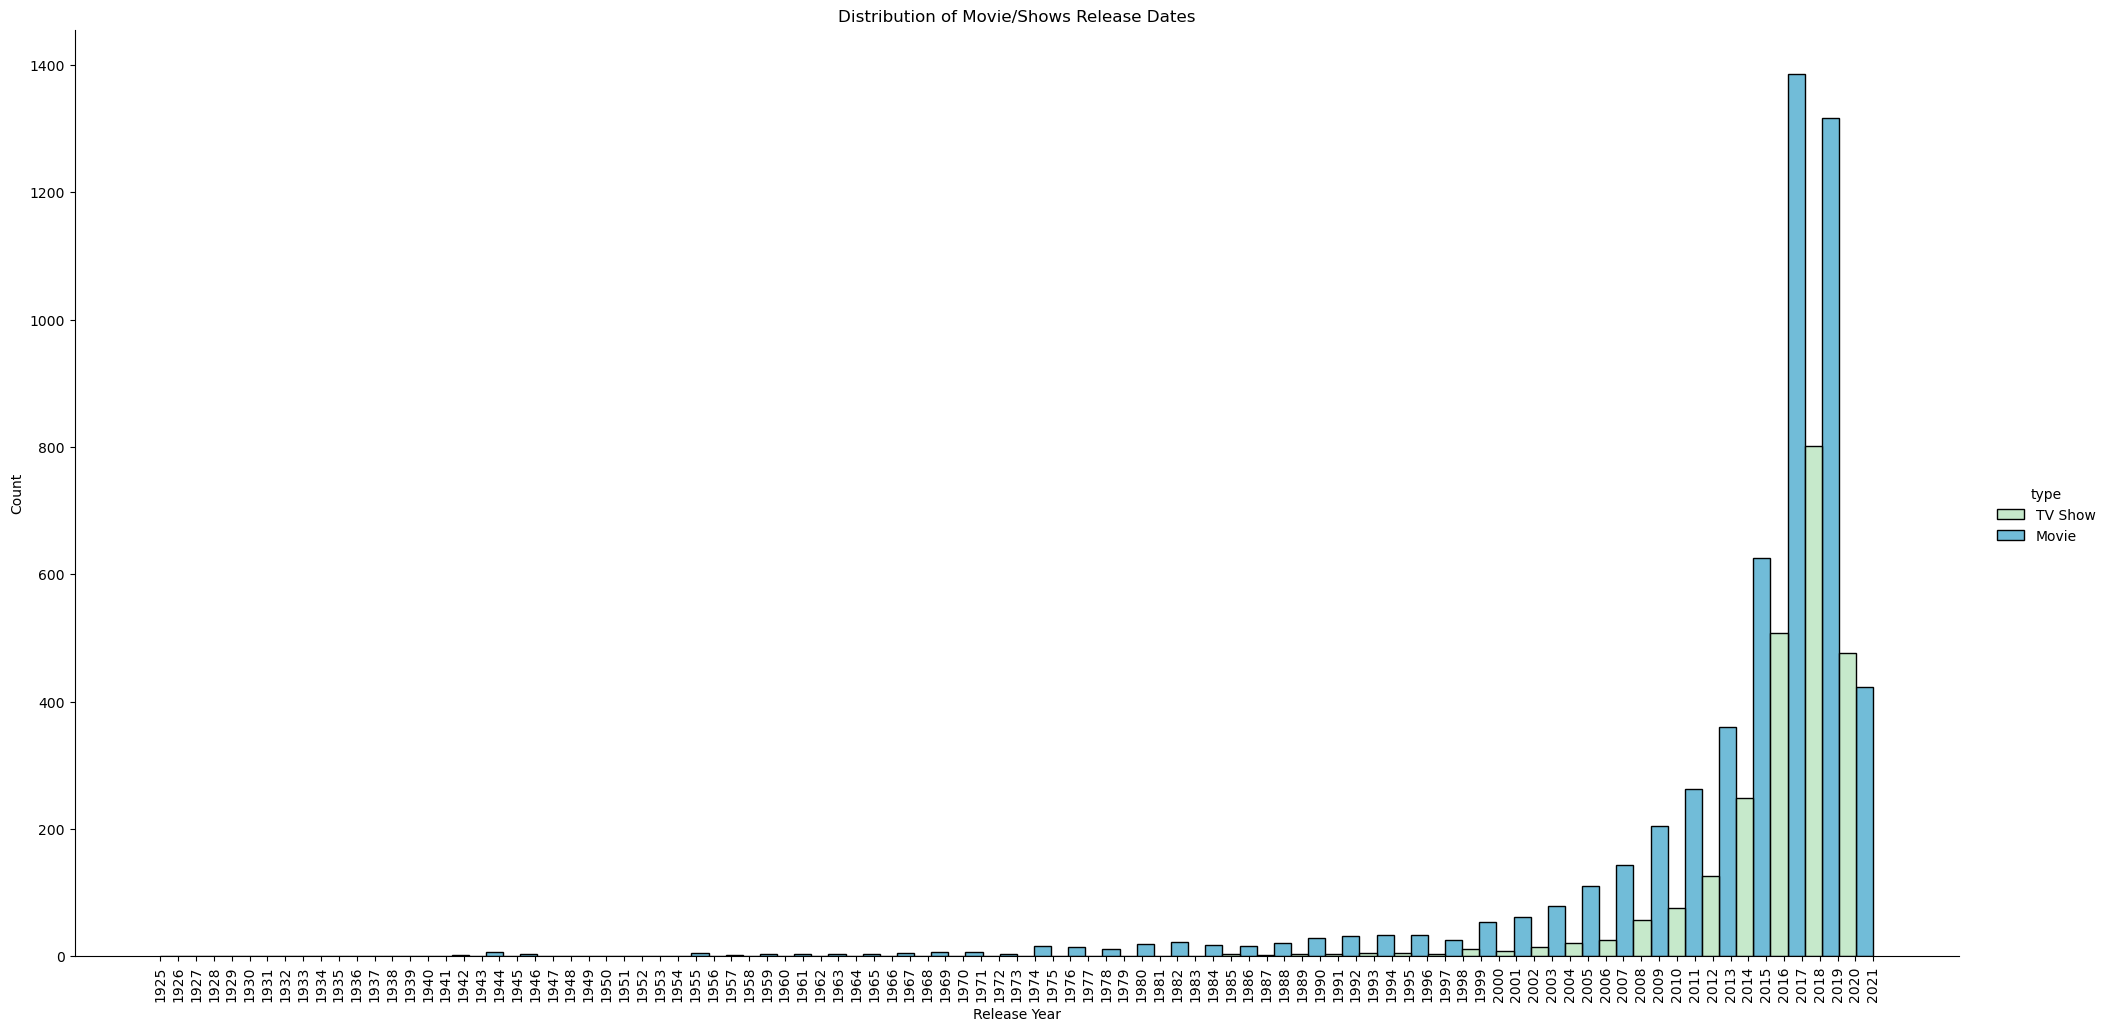

In [68]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

**OBSERVATIONS**
> * **Most Movies streaming on the platform were released after 2010**
> * **Most  TV Shows streaming on the platform were released after 2015**
> * **The year 2017 had highest number of Movie and TV show releases on the platform**

In [69]:
df['date_added'].dt.year.max()

2021.0

### **Histogram plot of dates of number of shows/movies added by the Streaming giant**

C:\Users\D Phanindra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x800 with 0 Axes>

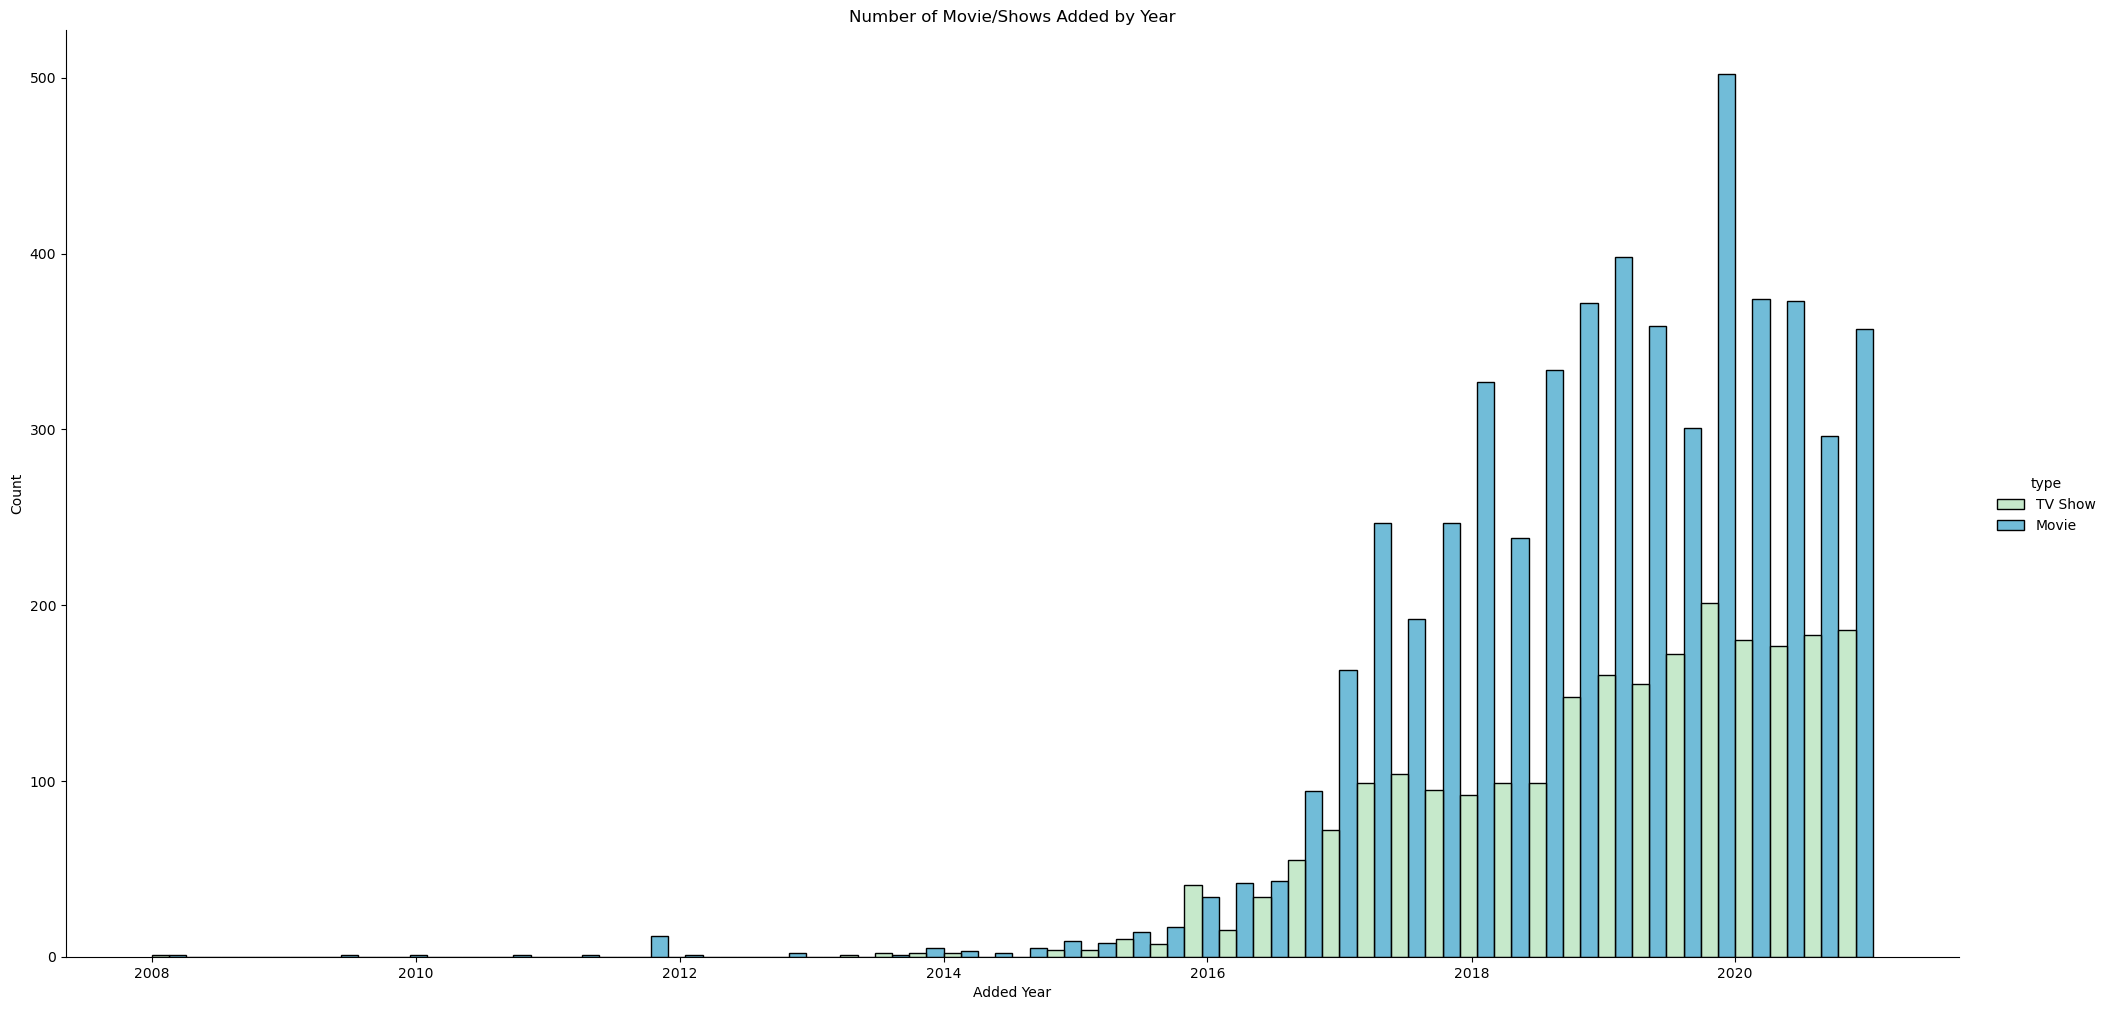

In [70]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')

**OBSERVATIONS**
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**

### **Type of Videos on Netflix**

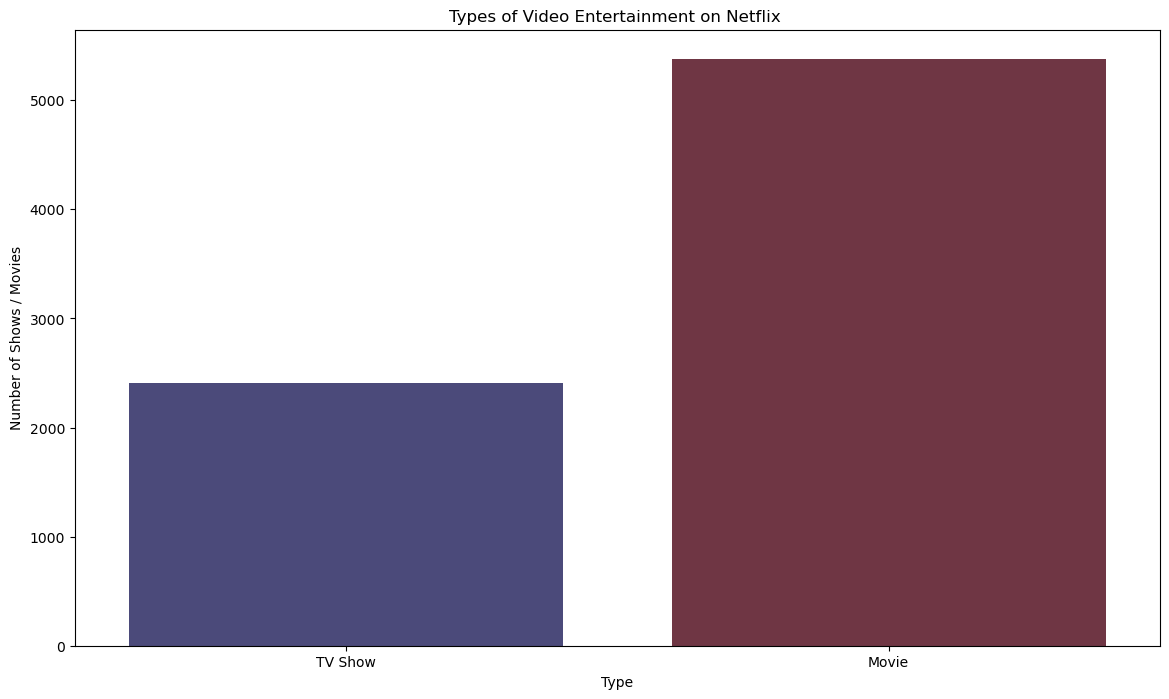

In [71]:
a = plt.figure(figsize=(14,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

**OBSERVATIONS**
> * **There are almost twice as many movies as TV shows on Netflix.**

### **Different Ratings on the Platform**

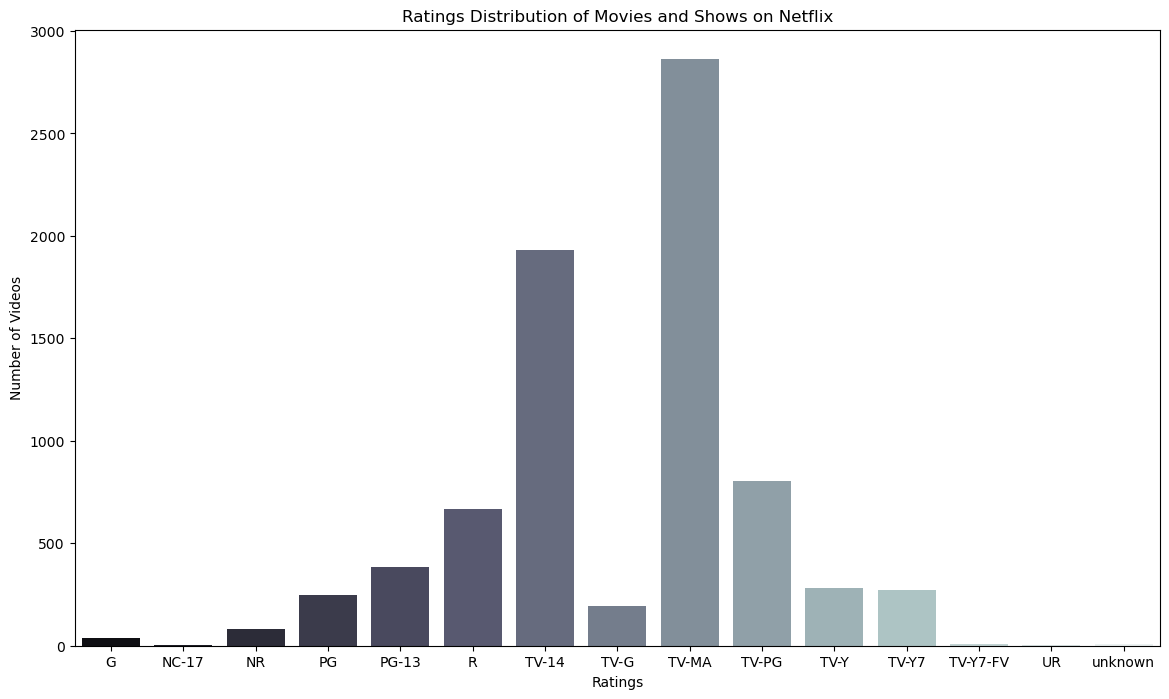

In [72]:
a = plt.figure(figsize=(14,8))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x= d['rating'], y=d['show_id'], palette='bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

**OBSERVATIONS**
> * **Most content on Netflix is rated for Mature Audiences and over 14 years old**

### **Top 10 Countries that produced content on Netflix**

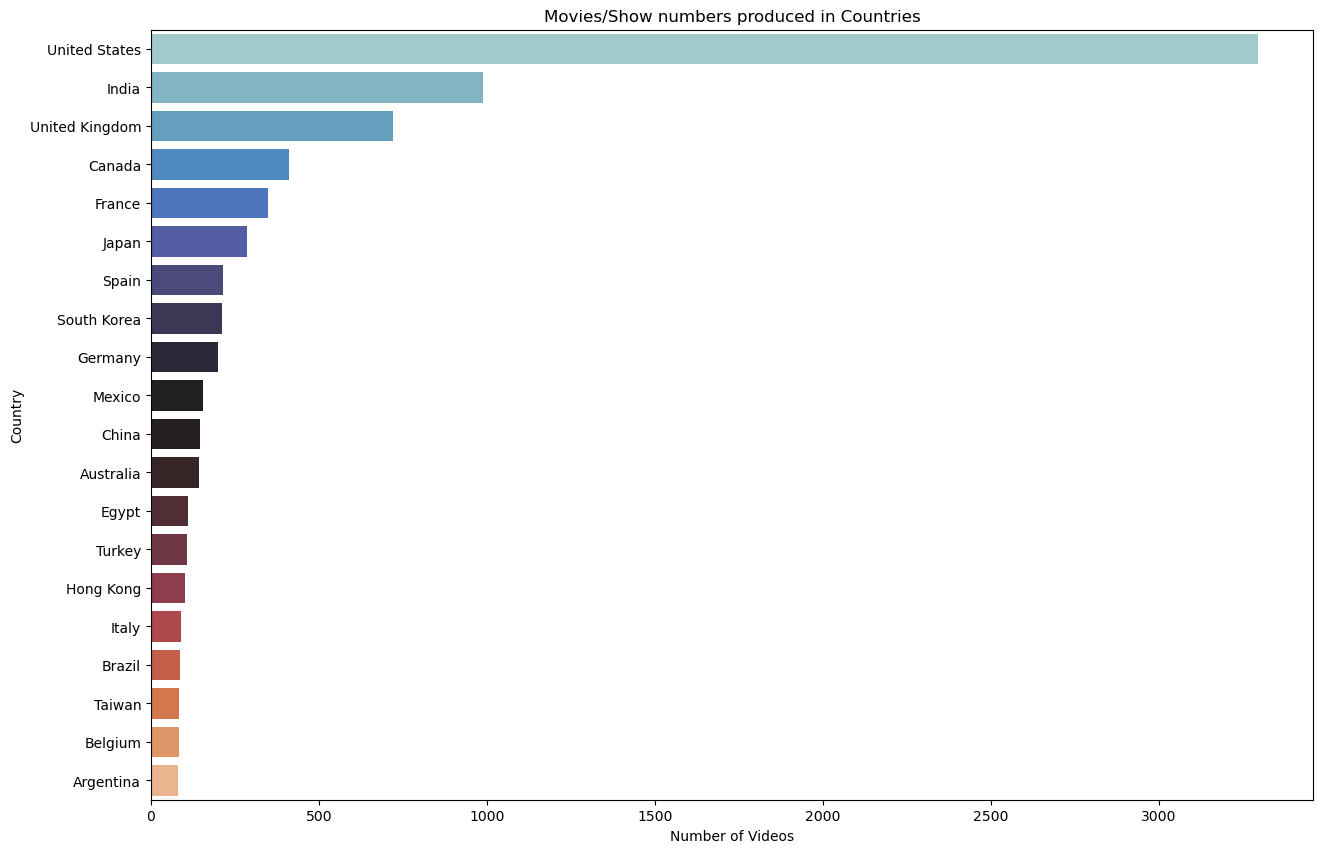

In [73]:
a = df[df.country != 'unknown'].loc[:,['show_id','title','country', 'listed_in']].copy()
countrylist = (a['country'].to_list())

newlist = []
for country in countrylist:
  if ',' in country:
    a = country.split(', ')
    newlist = newlist + a
  else:
    newlist.append(country)

country_list = pd.DataFrame({'country' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'country', x = 'id',data = a , palette='icefire')
a = plt.title('Movies/Show numbers produced in Countries')
a = plt.ylabel('Country')
a = plt.xlabel('Number of Videos')
top10countries = country_list.groupby('country').agg({'id':'count'}).sort_values('id', ascending= False).head(10).reset_index()['country'].unique()

**OBSERVATIONS**

>**Top Countries in Netflix are:**
1. **United States**
2.**India**
3.**United Kingdom**
4.**Canada**
5.**France**


### **Frequent Directors on Netflix**

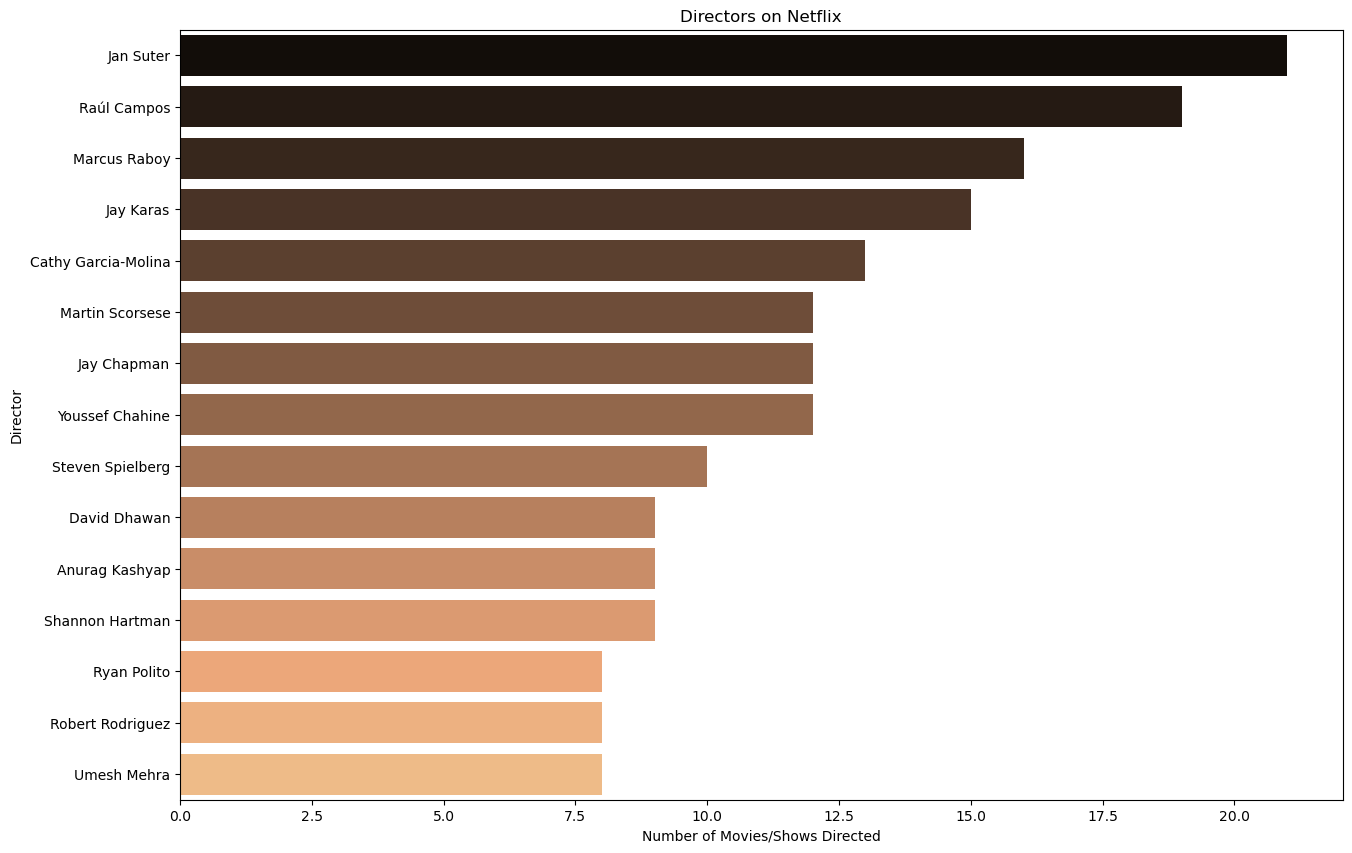

In [74]:
a=df[df.director != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
director = (a['director'].to_list())

newlist = []
for genre in director:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Director' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(15)
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Director', x = 'id',data = a , palette= 'copper')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10directors = country_list.groupby('Director').agg({'id':'count'}).sort_values('id', ascending= False).reset_index().head(10)['Director'].to_list()

**OBSERVATIONS**

> **Top Directors on Netflix are:**
1. **Jan Suter**
2.**Raul Campos**
3.**Marcus Raboy**
4.**Jay Karas**
5.**Cathy Garcia-Molina**



###**Frequent Cast on Netflix**

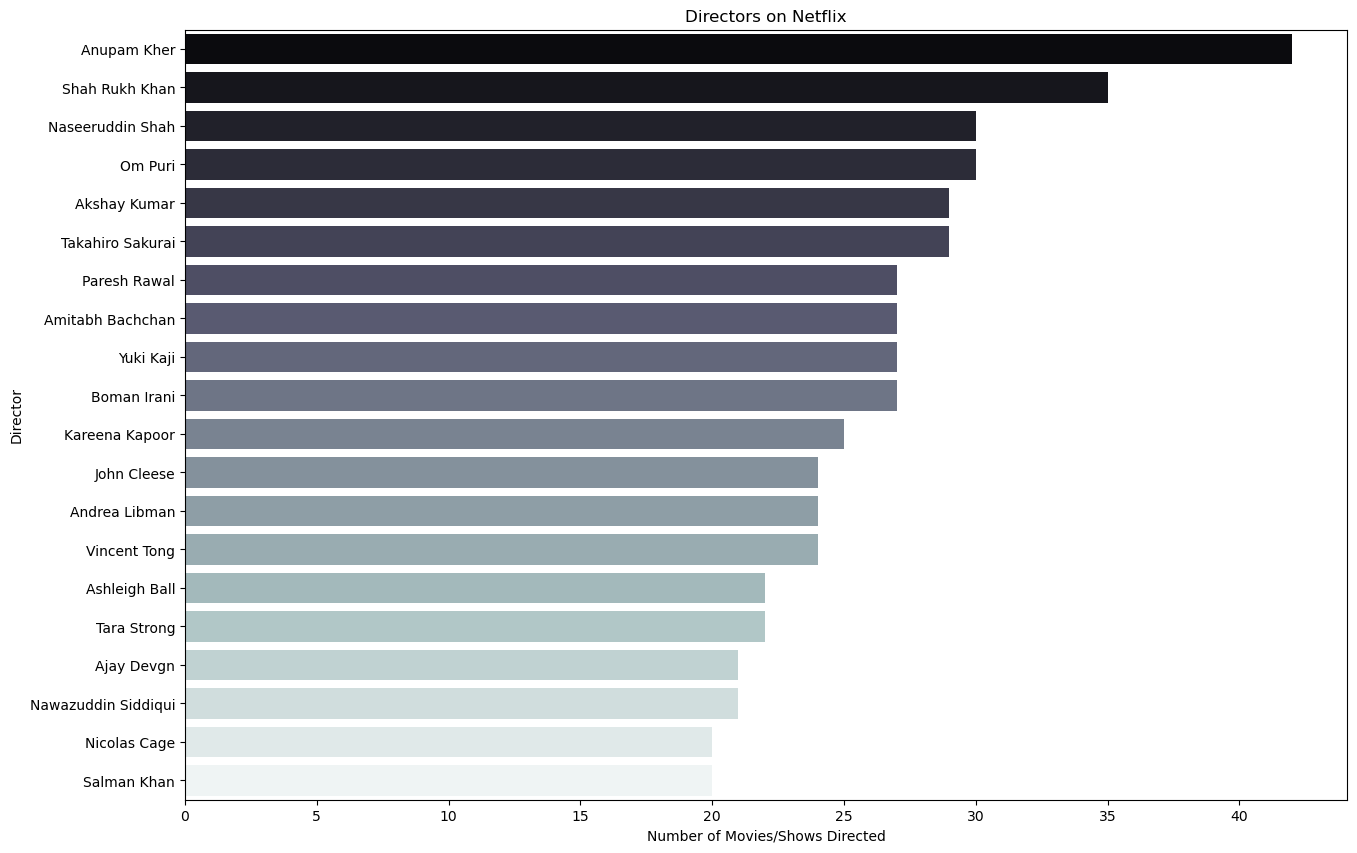

In [75]:
a=df[df.cast != 'unknown'].loc[:,['show_id','title','director', 'cast']].copy()
cast = (a['cast'].to_list())

newlist = []
for genre in cast:
  if ',' in genre:
    a = genre.split(', ')
    newlist = newlist + a
  else:
    newlist.append(genre)
country_list = pd.DataFrame({'Actor' : newlist, 'id':np.arange(0,len(newlist),1)})
a = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()
plt.figure(figsize=(15,10))
a = sns.barplot(y = 'Actor', x = 'id',data = a , palette= 'bone')
a = plt.title('Directors on Netflix')
a = plt.ylabel('Director')
a = plt.xlabel('Number of Movies/Shows Directed')
top10actors = country_list.groupby('Actor').agg({'id':'count'}).sort_values('id', ascending= False).head(20).reset_index()['Actor'].to_list()

**OBSERVATIONS**

> **Top Actors on Netflix are:**
1. **Anupam Kher**
2.**Shah Rukh Khan**
3.**Naseeruddin Shah**
4.**Om Puri**
5.**Akshay Kumar**



###**Duration of Movies on Netflix**

C:\Users\D Phanindra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


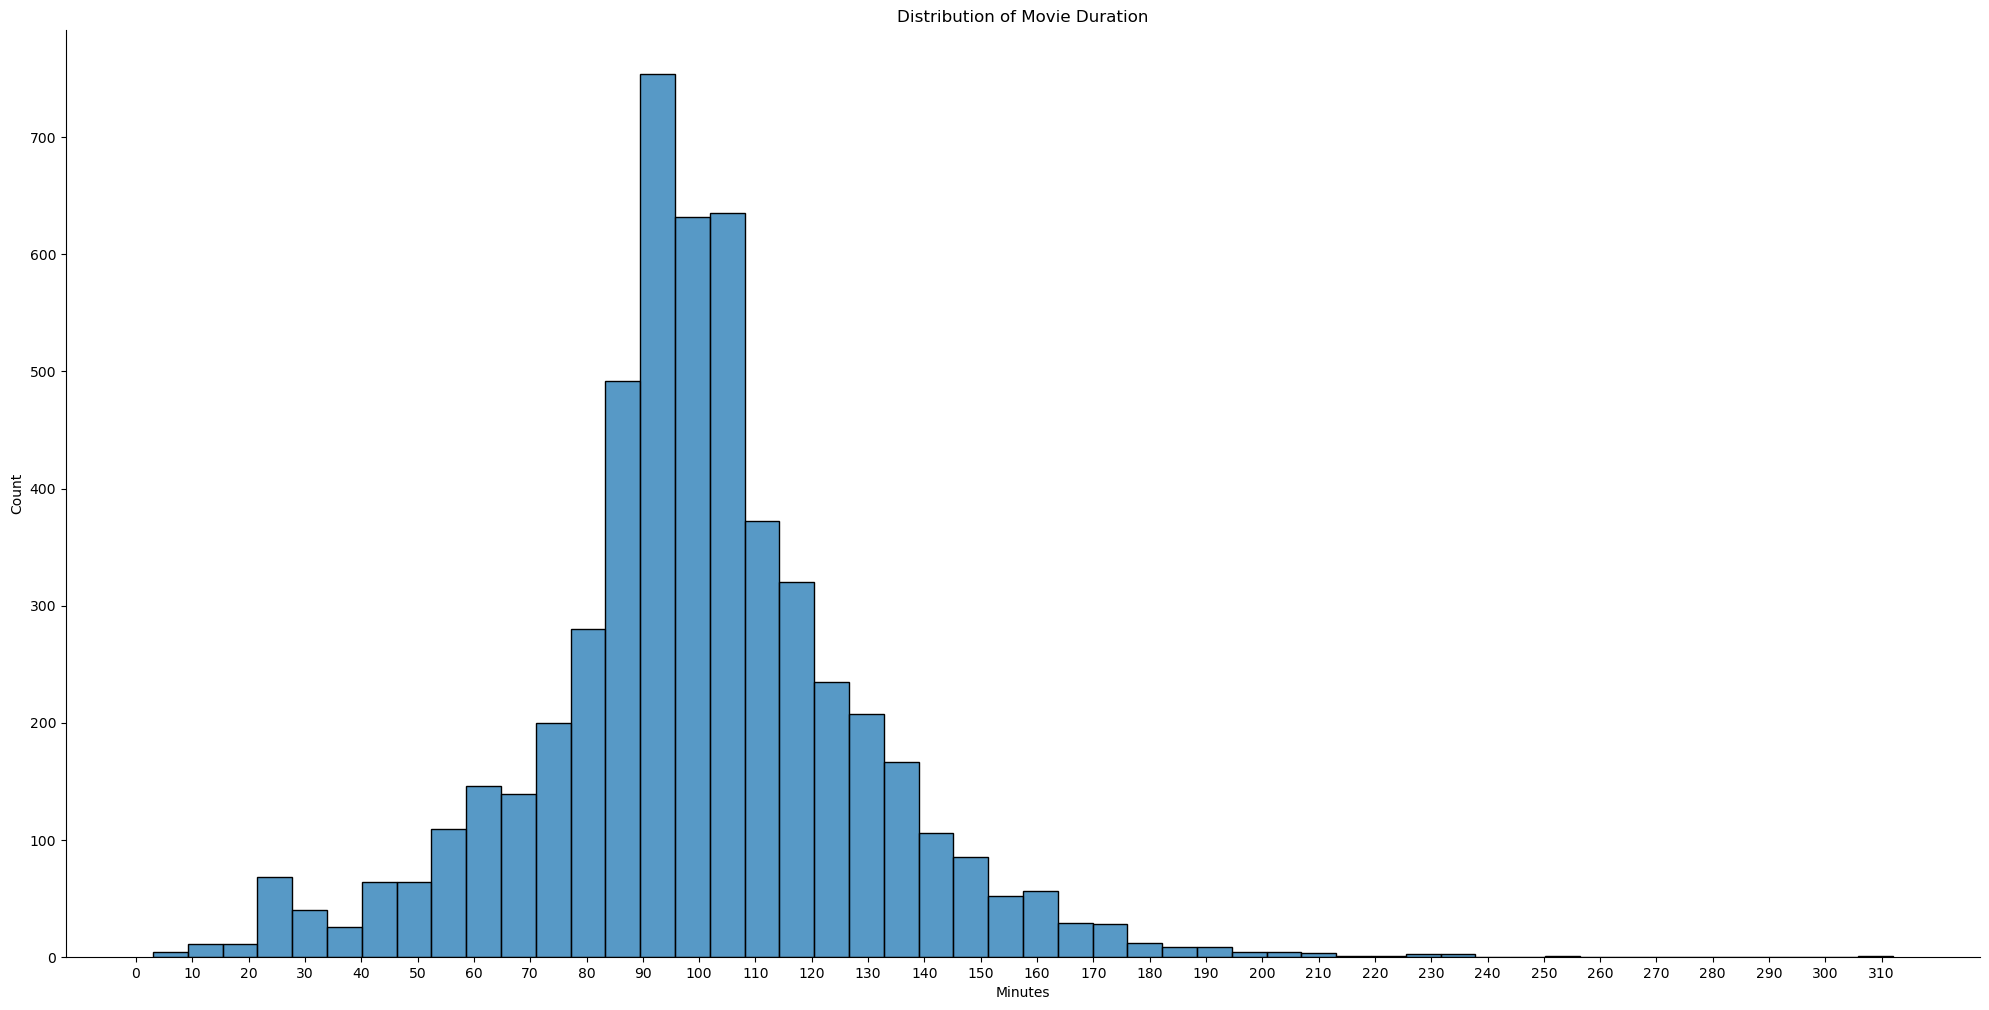

In [76]:
a=df[df['type']=='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Duration',  data = country_list, kind = 'hist', height=10, aspect=2, bins = 50)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,country_list.Duration.max()+1,10))

**OBSERVATIONS**
> * **Most movies on Netflix have a duration range from 90 to 110 minutes**

###**Duration of TV shows on Netflix**

C:\Users\D Phanindra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


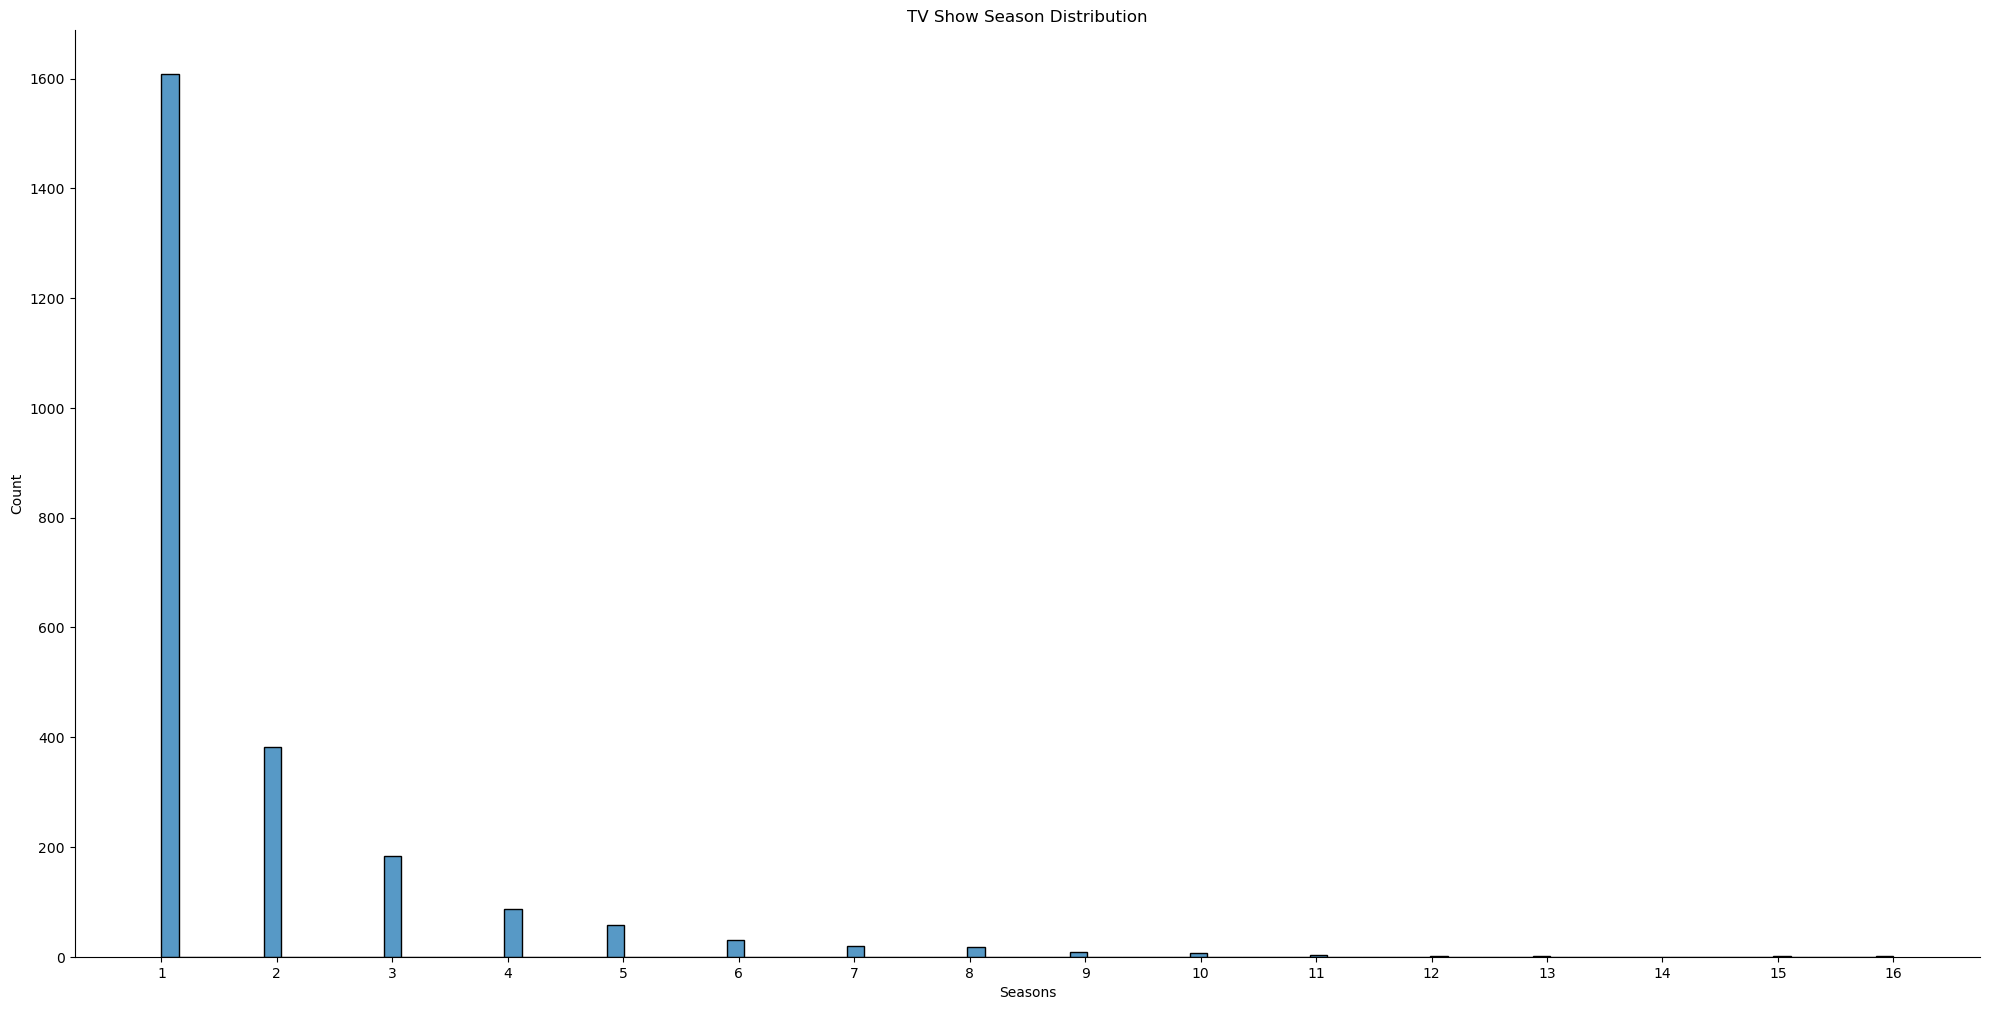

In [77]:
a=df[df['type']!='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Seasons' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Seasons',  data = country_list, kind = 'hist', height=10, aspect=2)
a = plt.title('TV Show Season Distribution')
a = plt.xlabel('Seasons')
a = plt.xticks(ticks = np.arange(country_list.Seasons.min(),country_list.Seasons.max()+1,1))

**OBSERVATIONS**
> * **Most TV shows on Netflix have a span of 1 season only**

###**Has Netflix Been Focusing Increasingly on TV Shows as compared to movies**

In [78]:
content = df.loc[:,['title','date_added','release_year', 'duration', 'type']].dropna().copy()

In [79]:
content['date_added'] = content['date_added'].dt.year

In [80]:
#Assuming TV shows release new seasons every year, we'll be adding a duplicate of the show for each season.
def season(row):
  release = row['release_year']
  added = row['date_added']

  if row['type'] =='TV Show':
    seasons = int(row['duration'][0])
    b = []
    for i in range(1, seasons+1):
      if i ==1:
        b.append(release)
      else:
        b.append(b[-1]-1)
    a = b
  else:
    a = []
    a.append(row['release_year'])      
  
  return a

content['Released Years'] = content.apply(lambda x: season(x),axis=1)

In [81]:
compare = content.explode('Released Years')

In [82]:
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [83]:
data = pd.concat([tv, movie], axis = 0)

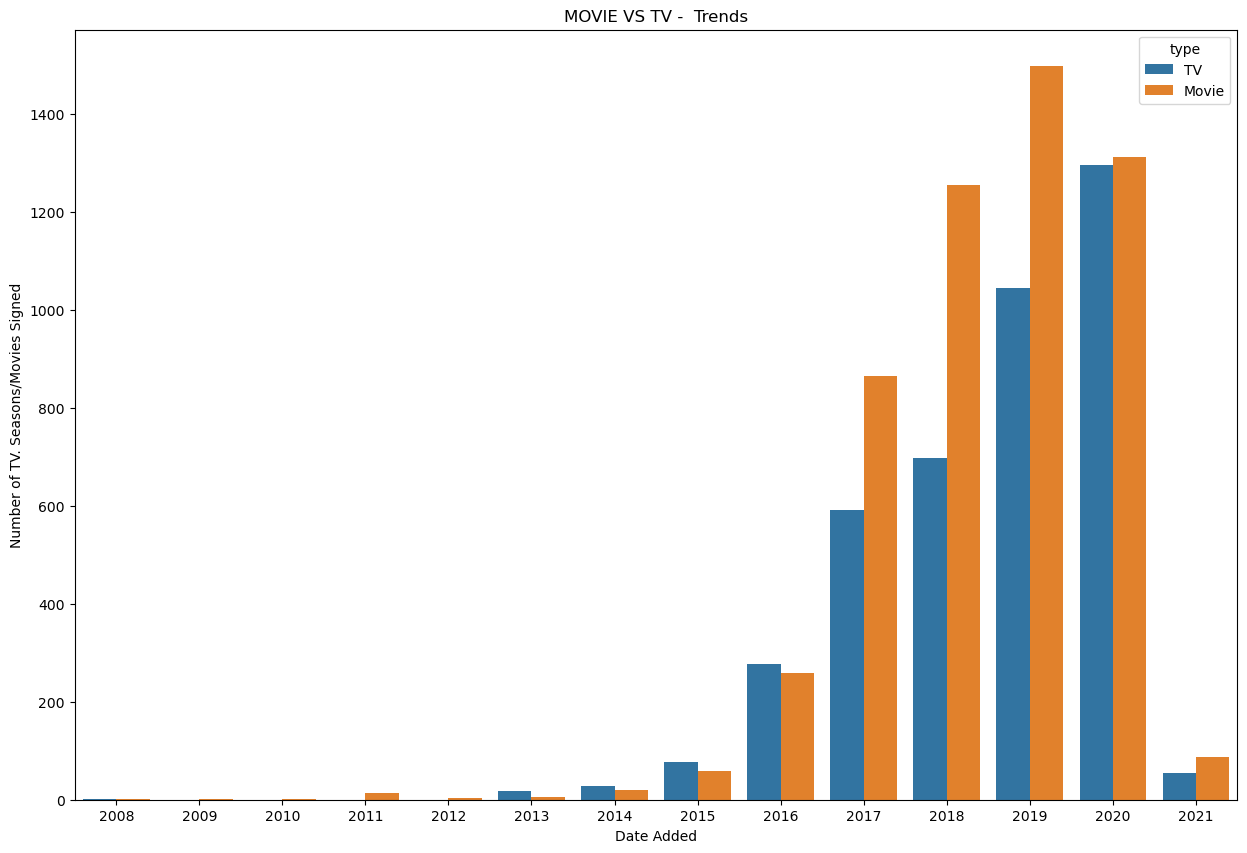

In [84]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'date_added', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Date Added')
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')


**OBSERVATIONS**

> * **The above graph depicts seasons of TV shows signed vs the movies signed**
> * **This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier**
> * **We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year**


In [85]:
tv = compare[compare['type'] == 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['Released Years']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [86]:
data = pd.concat([tv, movie], axis = 0)

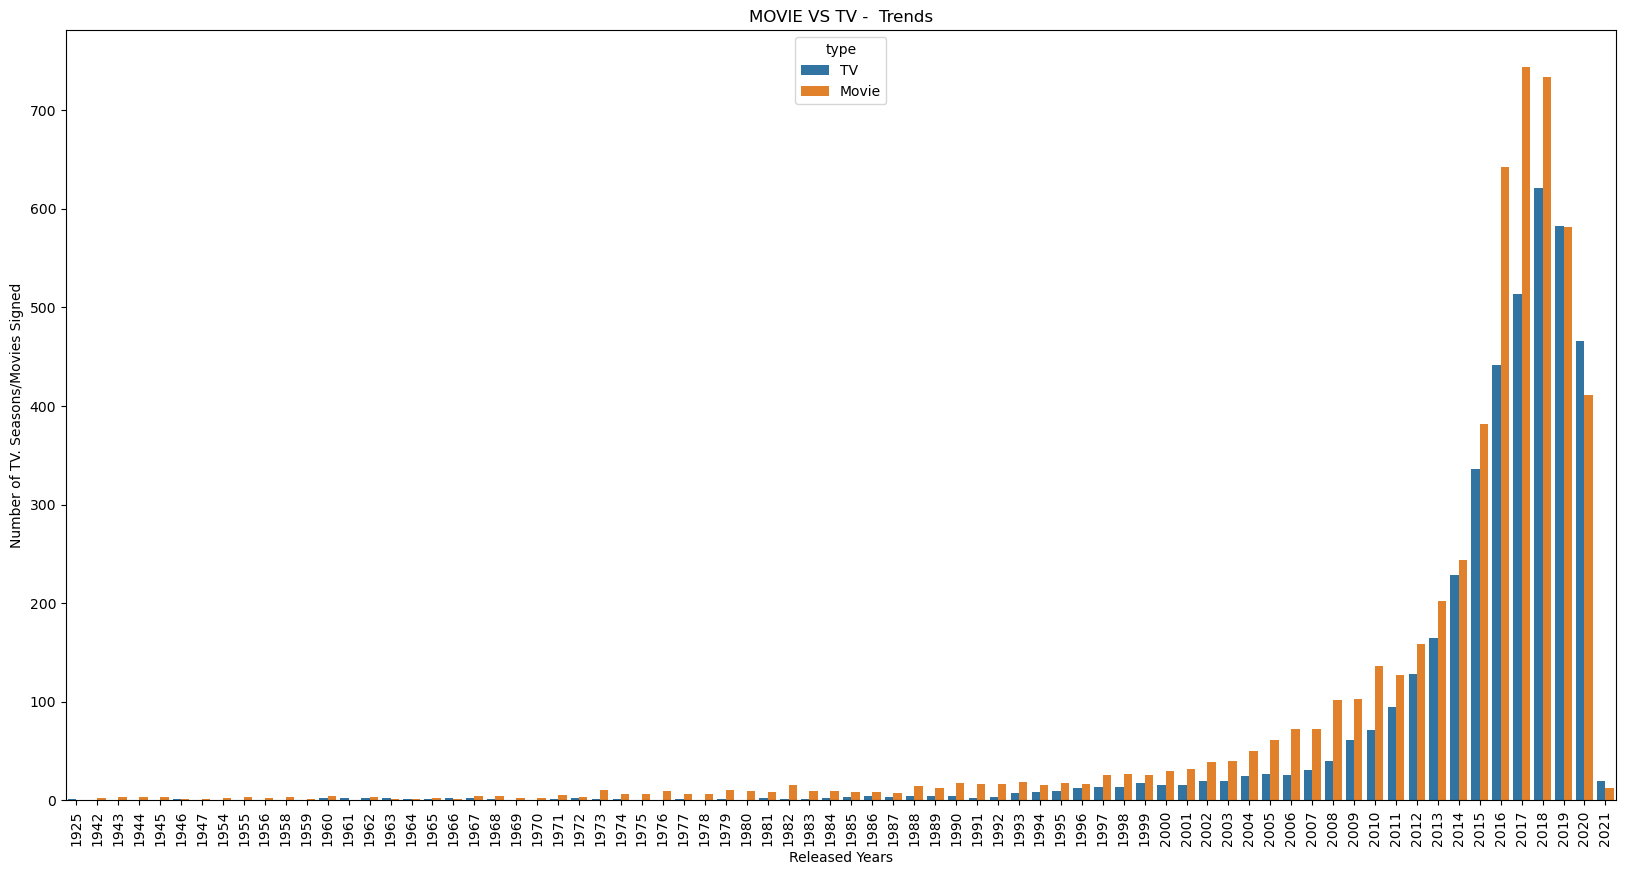

In [87]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Released Years', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Released Years')
plt.xticks(rotation = 90)
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')



**OBSERVATIONS**

> * **The above graph depicts an estimation of seasonal TV show and Movie release date per each year. We make a general assumption that each show releases a season yearly which is often the case for most TV shows.** 
> * **There are certainly exemptions. Eg. Ozark was released in years 2017, 2018, 2020 and 2022.** [ *P.S: Brilliant slow burn. Do check it out!* ]
>* **We can observe that TV releases outnumbering movies from 2010. It is a known fact that each show contains multiple episodes, hence we can confidently say that significant amount of video content is being enlisted under TV shows from 2010**
> * **Years 2019, 2020 and 2021 see multi-episode TV seasons outnumbering movies signed per year**

# Data Cleaning

In [88]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [89]:
# This function shows us how many rows and columns our dataset has
df.shape 

(7787, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [91]:
#dataset by applying the duplicated() method:
df.duplicated().sum()

0

# The result is 0, then it means there is no dupliacte values in the dataset.

In [92]:
# Now determine the missing values in the dataset
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [93]:
#Now replacing them using their show_id with loc: in the rating place
df.loc[df['show_id'] == 's68', 'rating'] = 'PG-13'
df.loc[df['show_id'] == 's2360', 'rating'] = 'PG-13'
df.loc[df['show_id'] == 's3661', 'rating'] = 'PG'
df.loc[df['show_id'] == 's3737', 'rating'] = 'PG-13' 
df.loc[df['show_id'] == 's3738', 'rating'] = 'PG-13'
df.loc[df['show_id'] == 's3739', 'rating'] = 'PG-13' 
df.loc[df['show_id'] == 's4324', 'rating'] = 'PG-13' 

#see the rows after replace action
df[df['show_id'].isin(['s68','s2360','s3661','s3737','s3738','s3739','s4324'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,unknown,"Oprah Winfrey, Ava DuVernay",unknown,2017-01-26,2017,PG-13,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,unknown,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,PG-13,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,unknown,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,PG,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,PG-13,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,PG-13,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,PG-13,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,PG-13,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [94]:
#replace all NULL values in the rest of the column
df['director'] = df['director'].fillna('Unspecified')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['duration']= df['duration'].fillna(df['duration'].mode()[0])

In [95]:
#And again checking for the missing values
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [96]:
#At Show_id Column i observed there is one prefix with starting will s,so romoving that.
df['show_id'] = df['show_id'].str.replace('s','')
df 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [97]:
#cast column, which contains a string of named actors who played in each show/movie, 
#i wanted to keep the main actor’s name before the (',')

df['cast'] = df['cast'].str.split(',').str[0]

In [98]:
# For easy understanding the cast name is changing into main_actor
df.rename(columns = {"cast":"main_actor"},inplace = True)

In [99]:
df.rename(columns = {"Listed_in":"genre"},inplace = True)

In [100]:
#i noticed that the rating column contained some values related to the duration of shows/movies
df[df['rating'].isin(['37 min','1 Season','1 Season','1 Season','74 min','84 min','66 min','115 min'])]
df.loc[df['show_id'] == 's68', 'rating'] = 'TV-MA'
df.loc[df['show_id'] == 's2360', 'rating'] = 'TV-MA'
df.loc[df['show_id'] == 's3661', 'rating'] = 'TV-MA'
df.loc[df['show_id'] == 's3737', 'rating'] = 'TV-MA' 
df.loc[df['show_id'] == 's3738', 'rating'] = 'TV-MA'
df.loc[df['show_id'] == 's3739', 'rating'] = 'TV-MA' 
df.loc[df['show_id'] == 's4324', 'rating'] = 'TV-MA'

In [129]:
#Along with keeping the main director
df[df['director'].str.contains(",", case=False, na=False)]

filtered_rows = df[df['director'].str.contains(",", na=False)]

df.loc[filtered_rows.index, 'director'] = filtered_rows['director'].str.split(",",n=1).str[0]

In [130]:
df

,show_id,type,title,director,main_actor,country,date_added,release_year,rating,duration,listed_in,description
0,1,TV Show,3%,unknown,João Miguel,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,4,Movie,9,Shane Acker,Elijah Wood,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,5,Movie,21,Robert Luketic,Jim Sturgess,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,7783,Movie,Zozo,Josef Fares,Imad Creidi,"Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,7784,Movie,Zubaan,Mozez Singh,Vicky Kaushal,India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,7786,TV Show,Zumbo's Just Desserts,unknown,Adriano Zumbo,Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
